### Experiments with ML models for Training & Evaluation

Install the require libraries

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
import string
from sklearn.model_selection import train_test_split

Data Loading

In [2]:
train_path = Path("../ML Engineer/train.csv")
test_path = Path("../ML Engineer/test.csv")
submission_path = Path("../ML Engineer/sample_submission.csv")

In [3]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
submission_data = pd.read_csv(submission_path)

In [4]:
train_data.head()

,id_,source,email,class
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,Subject: is the supply rebound beginning ? an ...,not_spam
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,Subject: email list - 100 million addresses $ ...,spam
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,Subject: alley dodecahedra suicide\nare you re...,spam
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,Subject: ibuyit project\ni wanted to share som...,not_spam
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,Subject: cheap vicodin online - us fda pharmac...,spam


Convert the class into numerical format in a target variable

In [5]:
df = train_data.copy()

encoder = LabelEncoder()

# Fit and transform the labels to numeric values
df['target'] = encoder.fit_transform(df['class'])
df.head()

,id_,source,email,class,target
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,Subject: is the supply rebound beginning ? an ...,not_spam,0
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,Subject: email list - 100 million addresses $ ...,spam,1
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,Subject: alley dodecahedra suicide\nare you re...,spam,1
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,Subject: ibuyit project\ni wanted to share som...,not_spam,0
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,Subject: cheap vicodin online - us fda pharmac...,spam,1


Functions for removing punctuations

In [6]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

remove_punctuation(df['email'][1])

'Subject email list  100 million addresses  79\njane \nhere is the information you requested\nyour email address  webmaster  efi  ie\ntargeted email address cd  rom\n100 million  addresses\nmore than 34 categories such as \n multi level marketers\n opportunity seekers\n telephone area code\n country  city  state  etc  \n people running home businesses or interested in home businesses \n travel  vacations\n opt  in\n people interested in investments\n people or businesses who spent more than  1000 on the web in thelast 2 months\nand many more\n contains us  international emails\n everything on this disk is in text file format and fully exportable \n the cd is as easy to use as browsing your c drive in explorer \nhow this amazing directory was compiled \n virtually every other email directory on the internet was taken and put it through an extensive email verification process thus eliminating all the dead addressess \n special software spiders through the web searching websites  newsgrou

Perform Text Cleaning Function

In [7]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
currency_symbols = r'[\$\£\€\¥\₹\¢\₽\₩\₪]'

def clean_text(text):
    text = text.lower()
    # Replace all occurrences of currency symbols with the word 'currency'
    text = re.sub(currency_symbols, 'currency', text)
    text = remove_punctuation(text)
    text=re.compile('<.*?>').sub('', text) 
    text = text.replace('_', '')
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    text = ' '.join(word for word in text.split() if word not in stop_words)
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())

    return text




clean_text(df['email'][1])

'subject email list million address currency jane information requested email address webmaster efi ie targeted email address cd rom million address category multi level marketer opportunity seeker telephone area code country city state etc people running home business interested home business travel vacation opt people interested investment people business spent currency web thelast month many contains u international email everything disk text file format fully exportable cd easy use browsing c drive explorer amazing directory compiled virtually every email directory internet taken put extensive email verification process thus eliminating dead address special software spider web searching website newsgroups many online database given keywords like area code industry city name etc find million fresh new address every week month currency regular price currency send reply email address place order read instruction order credit card visa mastercard american express simply complete order 

Save the clean text into clean_text feature

In [8]:
df['clean_text'] = df['email'].apply(lambda x: clean_text(x))
df.head()

,id_,source,email,class,target,clean_text
0,5732aa7f-0c44-4a4f-877a-0488aed0d1f7,2,Subject: is the supply rebound beginning ? an ...,not_spam,0,subject supply rebound beginning update cera o...
1,4d3c392d-a4f0-465d-baa3-2c15f1560f07,2,Subject: email list - 100 million addresses $ ...,spam,1,subject email list million address currency ja...
2,d47e95c0-4909-41b8-aec8-a3fb953fa18f,4,Subject: alley dodecahedra suicide\nare you re...,spam,1,subject alley dodecahedra suicide ready lomse ...
3,658a83eb-689c-480a-ae31-d622dc83f9f8,6,Subject: ibuyit project\ni wanted to share som...,not_spam,0,subject ibuyit project wanted share great news...
4,179d10b7-1c43-4e10-a0be-18d205b0fe24,4,Subject: cheap vicodin online - us fda pharmac...,spam,1,subject cheap vicodin online u fda pharmacy hy...


**Convert the Text into Numerical Vector**

Firstly, I have tried to explore the CountVectorizer & TfIdfVectorizer method for converting text into numerical format and Got good performance for the task. If I get bad results, then I thought to try word2vec, doc2vec, others advanced methods. But I get the good result with simple processes.

**CountVectorizer**

In [12]:
vectorizer = CountVectorizer(max_features=10000)
X_countvectorizer = vectorizer.fit_transform(df['clean_text'])
y_countvectorizer = df['target']
vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aaron', ..., 'zwallet', 'zyban', 'zzzz'],
      dtype=object)

**TfIdfVectorizer**

In [13]:
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(df['clean_text'])
y_tfidf = df['target']
vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aaron', ..., 'zwallet', 'zyban', 'zzzz'],
      dtype=object)

Perform the train split test to validate the result

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_countvectorizer, y_countvectorizer, test_size=0.2, random_state=42)
X_train_idf, X_test_idf, y_train_idf, y_test_idf = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=42)

**Multinomial Naive Bayes with CountVectorizer**

In [33]:
# Initialize the classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
print("Naive Bayes Classification Report:")
print(metrics.classification_report(y_test, y_pred_nb))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1403
           1       0.98      0.99      0.99      1597

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [34]:
print("Naive Bayes Accuracy Score:", metrics.accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy Score: 0.9846666666666667
Naive Bayes Confusion Matrix:
[[1379   24]
 [  22 1575]]


**Multinomial Naive Bayes with TfIdfVectorizer**

In [15]:
# Initialize the classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train_idf, y_train_idf)

# Predict on the test data
y_pred_nb_idf = nb_classifier.predict(X_test_idf)

# Evaluate the model
print("Naive Bayes Classification Report:")
print(metrics.classification_report(y_test_idf, y_pred_nb_idf))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1403
           1       0.99      0.99      0.99      1597

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [16]:
print("Naive Bayes Accuracy Score:", metrics.accuracy_score(y_test_idf, y_pred_nb_idf))
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test_idf, y_pred_nb_idf))

Naive Bayes Accuracy Score: 0.9866666666666667
Naive Bayes Confusion Matrix:
[[1381   22]
 [  18 1579]]


**Logistic Regression with CountVectorizer**

In [36]:
# Initialize the classifier
lr_classifier = LogisticRegression()

# Train the model
lr_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr_classifier.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(metrics.classification_report(y_test, y_pred_lr))
print("\nLogistic Regression Accuracy Score:", metrics.accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1403
           1       0.98      0.99      0.99      1597

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000


Logistic Regression Accuracy Score: 0.9853333333333333
Logistic Regression Confusion Matrix:
[[1368   35]
 [   9 1588]]


**Logistic Regression with TfIdfVectorizer**

In [17]:
# Initialize the classifier
lr_classifier = LogisticRegression()

# Train the model
lr_classifier.fit(X_train_idf, y_train_idf)

# Predict on the test data
y_pred_lr_idf = lr_classifier.predict(X_test_idf)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(metrics.classification_report(y_test_idf, y_pred_lr_idf))
print("\nLogistic Regression Accuracy Score:", metrics.accuracy_score(y_test_idf, y_pred_lr_idf))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test_idf, y_pred_lr_idf))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1403
           1       0.98      1.00      0.99      1597

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000


Logistic Regression Accuracy Score: 0.986
Logistic Regression Confusion Matrix:
[[1364   39]
 [   3 1594]]


**Support Vector Machine with CountVectorizer**

In [40]:
# Initialize the classifier
svm_classifier = LinearSVC()

# Train the model
svm_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
print("SVM Classification Report:")
print(metrics.classification_report(y_test, y_pred_svm))

print("\nSupport Vector Machine Accuracy Score:", metrics.accuracy_score(y_test, y_pred_svm))
print("Support Vector Machine Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1403
           1       0.92      0.99      0.95      1597

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000


Support Vector Machine Accuracy Score: 0.9483333333333334
Support Vector Machine Confusion Matrix:
[[1264  139]
 [  16 1581]]


**GridSearchCV for finding the best model with CountVectorizer**

In [45]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_countvectorizer, y_countvectorizer, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


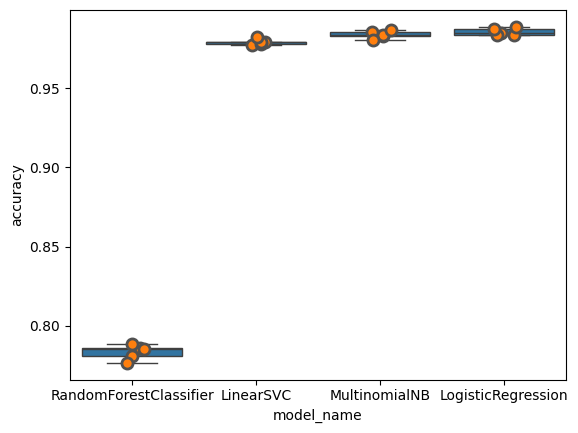

In [46]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, linewidth=2)
plt.show()

With CountVectorizer, Logistic Regression model performs better than other models.

In [47]:
print(cv_df)
print("\n\n")
print(cv_df.groupby('model_name').accuracy.mean())

                model_name  fold_idx  accuracy
0   RandomForestClassifier         0  0.786000
1   RandomForestClassifier         1  0.788667
2   RandomForestClassifier         2  0.780667
3   RandomForestClassifier         3  0.776667
4   RandomForestClassifier         4  0.785333
5                LinearSVC         0  0.977333
6                LinearSVC         1  0.979333
7                LinearSVC         2  0.977667
8                LinearSVC         3  0.979333
9                LinearSVC         4  0.982333
10           MultinomialNB         0  0.982667
11           MultinomialNB         1  0.983333
12           MultinomialNB         2  0.985667
13           MultinomialNB         3  0.980333
14           MultinomialNB         4  0.986667
15      LogisticRegression         0  0.983667
16      LogisticRegression         1  0.984667
17      LogisticRegression         2  0.983333
18      LogisticRegression         3  0.987333
19      LogisticRegression         4  0.988667



model_name

**GridSearchCV hyperparameter with TfIdfVectorizer**

Here Linear Support Vector Machine performs better than all other models.

In [18]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_tfidf, y_tfidf, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
print(cv_df)

                model_name  fold_idx  accuracy
0   RandomForestClassifier         0  0.781000
1   RandomForestClassifier         1  0.788667
2   RandomForestClassifier         2  0.786667
3   RandomForestClassifier         3  0.778000
4   RandomForestClassifier         4  0.785667
5                LinearSVC         0  0.988667
6                LinearSVC         1  0.990000
7                LinearSVC         2  0.989000
8                LinearSVC         3  0.992667
9                LinearSVC         4  0.991667
10           MultinomialNB         0  0.987667
11           MultinomialNB         1  0.986000
12           MultinomialNB         2  0.987333
13           MultinomialNB         3  0.985333
14           MultinomialNB         4  0.989333
15      LogisticRegression         0  0.986000
16      LogisticRegression         1  0.985333
17      LogisticRegression         2  0.983000
18      LogisticRegression         3  0.988000
19      LogisticRegression         4  0.985000


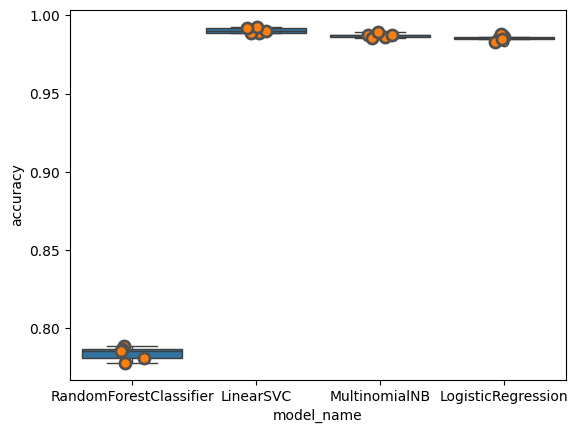

In [19]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, linewidth=2)
plt.show()

In [20]:
print(cv_df.groupby('model_name').accuracy.mean())

model_name
LinearSVC                 0.990400
LogisticRegression        0.985467
MultinomialNB             0.987133
RandomForestClassifier    0.784000
Name: accuracy, dtype: float64


Trying the best hyperparameter for the Linear Support Vector Machine.

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'tol': [1e-4, 1e-5, 1e-6],
    'max_iter': [1000, 5000, 10000]
}

grid_search = GridSearchCV(LinearSVC(dual='auto', random_state=42), param_grid, cv=5)
grid_search.fit(X_tfidf, y_tfidf)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

c:\Users\abdullah\projects\Online Test\mPowerOnlineTest\venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Parameters:  {'C': 1, 'max_iter': 1000, 'tol': 0.0001}
Best Score:  0.9904
